In [1]:
import os
os.listdir()

['second_model.ipynb',
 'data',
 'train.csv',
 'DataCleaning.ipynb',
 'EDA.ipynb',
 'PA_201605-2012001更新R6(20190509).xlsx',
 'tag盤點表.xlsx',
 'xgboost.ipynb',
 'LSTM.ipynb',
 'train_FeatureSelected.csv',
 'feature select.ipynb',
 'tpot_pa_pipeline.py',
 'TPOT.ipynb',
 'three_model.ipynb',
 'cnn-time-stack.ipynb',
 '.ipynb_checkpoints']

# LOAD

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [3]:
df = pd.read_csv('./data/train_FeatureSelected(2016~2017).csv',index_col = 0,parse_dates = True)
print(df.shape)
df.head()

(52704, 38)


,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B10,MLPAP_TI-0706B14,MLPAP_TI-0706B16,MLPAP_TI-0706B18,MLPAP_TI-0706B19,...,MLPAP_FR-0632.PV,MLPAP_TIC-0757A.PV,MLPAP_TRC-0762.PV,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target,target_over_range
2016-05-09 00:00:00,399.996956,401.962157,402.245915,401.143639,400.998932,402.001481,402.997679,402.048413,401.047635,402.998548,...,-0.001134,399.694655,401.207034,4.050917,4.045456,6.484379,1.635430,0.050999,5.428077,1.0
2016-05-09 00:10:00,399.996956,401.939352,402.245915,401.004025,400.998932,402.001481,403.098684,402.003686,401.047635,402.998548,...,-0.001134,399.694655,401.089849,4.157893,4.152288,6.449854,1.624784,0.050999,5.428077,1.0
2016-05-09 00:20:00,399.996956,401.905143,402.104563,401.004025,400.998932,402.001481,402.997679,402.003686,401.004128,402.998548,...,-0.001134,399.739510,401.060553,4.207893,4.202220,6.440330,1.649624,0.050999,5.428077,1.0
2016-05-09 00:30:00,399.996956,401.950754,402.304812,401.004025,400.998932,402.001481,403.098684,402.003686,401.102020,402.998548,...,-0.001134,399.795577,401.470701,4.152079,4.146482,6.464140,1.635430,0.050999,5.428077,1.0
2016-05-09 00:40:00,399.996956,401.996366,402.175239,401.004025,400.998932,402.001481,403.098684,402.003686,401.145528,402.998548,...,-0.001134,399.795577,401.460935,4.016615,4.011200,6.415329,1.653172,0.050999,5.428077,1.0


# LOAD SPEC

In [4]:
tag_sheet = pd.read_excel('tag盤點表.xlsx')
spec = tag_sheet[tag_sheet['TAG'].isin(df.columns.tolist())][['TAG','min','max']]
spec = spec.set_index('TAG')
spec.loc['DATA OF USE','min'] = 0
spec.loc['DATA OF USE','max'] = np.inf
spec

,min,max
TAG,,
MLPAP_FR-0632.PV,30,90
MLPAP_TIC-0757A.PV,345,365
MLPAP_TRC-0762.PV,345,365
MLPAP_TI-0706A01,340,450
MLPAP_TI-0706D01,340,450
MLPAP_TI-0706E01,340,450
MLPAP_TI-0716E01,340,450
MLPAP_FR-0755.PV,0,25
MLPAP_FR-0791.PV,10,35


# OVER RANGE COUNT

In [5]:
def check_spec(df,spec):
    df_col = list(df.columns)
    spec_col = list(spec.index)
    intersection = set(df_col) & set(spec_col)
    df['over_range_num'] = 0
    for col in tqdm(list(intersection)):
        lb, ub = spec.loc[col,'min'], spec.loc[col,'max']
        over_range = (df[col]<lb)|(df[col]>ub)
        df.loc[over_range,'over_range_num'] += 1
    return df

In [6]:
df = check_spec(df,spec)

/workspace/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


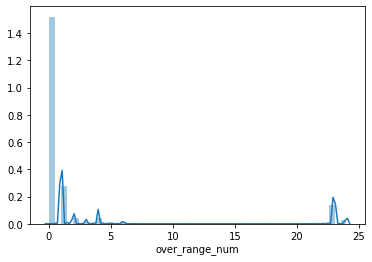

In [7]:
sns.distplot(df['over_range_num'])

# scale data

In [8]:
from sklearn.preprocessing import MinMaxScaler

x_col = df.drop(['target','target_over_range','over_range_num'],axis=1).columns.tolist()
y_col = 'target'
out = (df['target_over_range']==1)|(df['over_range_num']>0)

mm = MinMaxScaler()
mm.fit(df.loc[~out,x_col])

df[x_col] = mm.transform(df[x_col])

df.head()

,MLPAP_TI-0706B02,MLPAP_TI-0706B03,MLPAP_TI-0706B05,MLPAP_TI-0706B06,MLPAP_TI-0706B07,MLPAP_TI-0706B10,MLPAP_TI-0706B14,MLPAP_TI-0706B16,MLPAP_TI-0706B18,MLPAP_TI-0706B19,...,MLPAP_TIC-0757A.PV,MLPAP_TRC-0762.PV,MLPAP_FR-0755.PV,MLPAP_FR-0755PV(轉換後),MLPAP_FR-0791.PV,MLPAP_TIC-0757.PV,MLPAP_V125-PHD,target,target_over_range,over_range_num
2016-05-09 00:00:00,0.89958,0.519270,0.403769,0.479334,0.514931,0.850043,1.651707,1.755934,2.748175,3.073021,...,3.480435,3.069196,0.001157,0.001157,-0.520155,0.695962,0.351343,5.428077,1.0,6
2016-05-09 00:10:00,0.89958,0.518814,0.403769,0.477038,0.514931,0.850043,1.656098,1.753870,2.748175,3.073021,...,3.480435,3.062500,0.006761,0.006761,-0.521996,0.693587,0.351343,5.428077,1.0,6
2016-05-09 00:20:00,0.89958,0.518130,0.401595,0.477038,0.514931,0.850043,1.651707,1.753870,2.745255,3.073021,...,3.483333,3.060826,0.009380,0.009380,-0.522504,0.699129,0.351343,5.428077,1.0,6
2016-05-09 00:30:00,0.89958,0.519042,0.404676,0.477038,0.514931,0.850043,1.656098,1.753870,2.751825,3.073021,...,3.486957,3.084263,0.006456,0.006456,-0.521234,0.695962,0.351343,5.428077,1.0,6
2016-05-09 00:40:00,0.89958,0.519954,0.402682,0.477038,0.514931,0.850043,1.656098,1.753870,2.754745,3.073021,...,3.486957,3.083705,-0.000640,-0.000640,-0.523837,0.699921,0.351343,5.428077,1.0,6


# stack time_step

In [9]:
def train_windows(df, ref_day=36):
    X_train, Y_train, i_lst = [], [], []
    for i in tqdm(range(df.shape[0]-ref_day)):
        # 篩選條件
        C1 = (df.iloc[i+ref_day]['target_over_range'] == 0)
        C2 = (df.iloc[i:i+ref_day+1]['over_range_num'].mean() == 0)
        if C1&C2: 
            X_train.append(np.array(df.iloc[i:i+ref_day+1][x_col]))
            Y_train.append(df.iloc[i+ref_day][y_col])
            i_lst.append(df.iloc[[i+ref_day]].index[0])
    # 重整格式
    X_train = np.array(X_train)
    Y_train = pd.Series(Y_train,index=i_lst,name='y')
    return X_train, Y_train

In [10]:
X, y = train_windows(df, ref_day=35)
print(X.shape,y.shape)

/workspace/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



(35080, 36, 36) (35080,)


# split

In [11]:
train_len = int(len(X)*0.8)
X_train,X_val_test = X[:train_len],X[train_len:]
y_train,y_val_test = y[:train_len],y[train_len:]

val_len = int(len(X_val_test)*0.5)
X_val,X_test = X_val_test[:val_len],X_val_test[val_len:]
y_val,y_test = y_val_test[:val_len],y_val_test[val_len:]

print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(28064, 36, 36) (28064,)
(3508, 36, 36) (3508,)
(3508, 36, 36) (3508,)


# LSTM MODEL(manyToOne1)

In [12]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM,TimeDistributed,Dense,Flatten
from keras.optimizers import Adam
from keras.layers import Activation
import warnings;warnings.simplefilter('ignore')

def buildManyToOneModel(shape):
  model = Sequential()
  model.add(LSTM(36,return_sequences=False,input_shape=shape))
  model.add(Dense(1))
  model.compile(loss="mse", optimizer="adam")
  model.summary()
  return model

model = buildManyToOneModel(X_train[0].shape)

Using TensorFlow backend.
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/workspace/conda/lib/python3.6/site-packages/tensorflow/python/framework/d

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 36)                10512     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 37        
Total params: 10,549
Trainable params: 10,549
Non-trainable params: 0
_________________________________________________________________


# train model

In [13]:
history = model.fit(X_train,y_train,
                    batch_size = 128,
                    epochs = 10,
                    validation_data = (X_val,y_val),
                    verbose = 1)

Train on 28064 samples, validate on 3508 samples
Epoch 1/10
28064/28064 [==============================] - 11s 401us/step - loss: 0.0086 - val_loss: 0.0024
Epoch 2/10
28064/28064 [==============================] - 10s 360us/step - loss: 3.9879e-04 - val_loss: 5.7183e-04
Epoch 3/10
28064/28064 [==============================] - 10s 353us/step - loss: 2.2540e-04 - val_loss: 4.6176e-04
Epoch 4/10
28064/28064 [==============================] - 10s 362us/step - loss: 1.7956e-04 - val_loss: 5.2826e-04
Epoch 5/10
28064/28064 [==============================] - 10s 368us/step - loss: 1.5943e-04 - val_loss: 5.8135e-04
Epoch 6/10
28064/28064 [==============================] - 10s 359us/step - loss: 1.4599e-04 - val_loss: 6.6940e-04
Epoch 7/10
28064/28064 [==============================] - 10s 355us/step - loss: 1.4138e-04 - val_loss: 7.7959e-04
Epoch 8/10
28064/28064 [==============================] - 10s 360us/step - loss: 1.3731e-04 - val_loss: 7.5925e-04
Epoch 9/10
28064/28064 [===============

# evaluate model

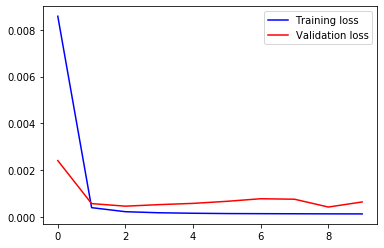

In [19]:
n = 0
plt.plot(history.history['loss'][n:], color='b', label="Training loss")
plt.plot(history.history['val_loss'][n:], color='r', label="Validation loss")
plt.legend()

# plot predict line

In [15]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def metric(y_true,y_pred,name):
    t = pd.DataFrame(index=[name])
    t['r2'] = r2_score(y_true,y_pred)
    t['rmse'] = sqrt(mean_squared_error(y_true,y_pred))
    t['mape'] = mape(y_true,y_pred)
    t = t.apply(lambda x:round(x,4))
    return t

def plot_predict(y_true,y_pred,name):
    # sort index
    y_pred = y_pred.sort_index()
    y_true = y_true.sort_index()
    # plot
    plot_data = pd.concat([y_pred,y_true],axis=1)
    n = int(len(y_pred)/100)
    plot_data.rolling(n).mean().plot()
    plt.title('move_avg {}'.format(n))
    plt.show()
    # score
    print(metric(y_true,y_pred,name))

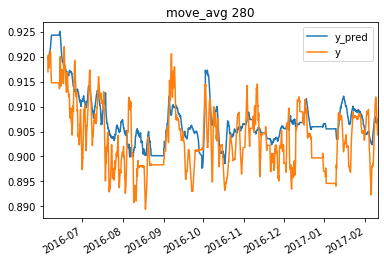

           r2    rmse    mape
train -0.0439  0.0117  1.1352


In [16]:
y_pred = model.predict(X_train).ravel()
y_pred = pd.DataFrame(y_pred,index=y_train.index,columns=['y_pred'])
plot_predict(y_train,y_pred,'train')

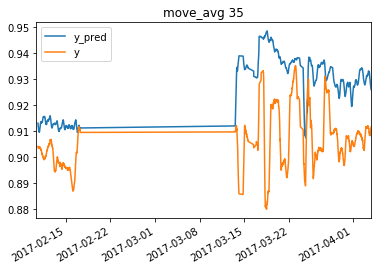

         r2    rmse   mape
val -3.2882  0.0253  2.589


In [17]:
y_pred = model.predict(X_val).ravel()
y_pred = pd.DataFrame(y_pred,index=y_val.index,columns=['y_pred'])
plot_predict(y_val,y_pred,'val')

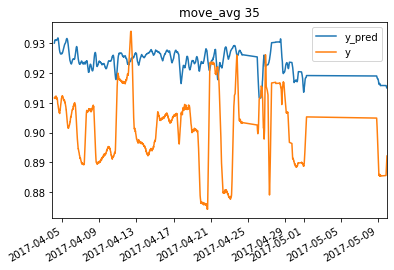

          r2    rmse    mape
test -2.8606  0.0265  2.6205


In [18]:
y_pred = model.predict(X_test).ravel()
y_pred = pd.DataFrame(y_pred,index=y_test.index,columns=['y_pred'])
plot_predict(y_test,y_pred,'test')